# King James Bible Counts And Graphs With Python

For the following exercises we will work with the King James Bible, read from a txt file with the following format:

Book Chapter:Verse

as shown in the example below:
>Zechariah 14:20	In that day shall there be upon the bells of the horses, HOLINESS UNTO THE LORD; and the pots in the LORD’S house shall be like the bowls before the altar.
>Zechariah 14:21	Yea, every pot in Jerusalem and in Judah shall be holiness unto the LORD of hosts: and all they that sacrifice shall come and take of them, and seethe therein: and in that day there shall be no more the Canaanite in the house of the LORD of hosts.
>Malachi 1:1	The burden of the word of the LORD to Israel by Malachi.
>Malachi 1:2	I have loved you, saith the LORD. Yet ye say, Wherein hast thou loved us? [Was] not Esau Jacob’s brother? saith the LORD: yet I loved Jacob,
>Malachi 1:3	And I hated Esau, and laid his mountains and his heritage waste for the dragons of the wilderness.

## A Few Basic Functions

In [59]:
import re
import pandas as pd
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import numpy as np
import random

# Define the path to your local text file
file_path = 'king_james_bible.txt'


# 1) A view easy functions to clean strings and extract information
def count_characters(line):
    """Remove white spaces and count"""
    # remove strange chars
    line = clean_up_verse(line)
    # remove white spaces
    line = line.replace(' ', '')

    return len(line)


def clean_up_verse(line, include_white_space=False):
    """Remove non readable characters"""
    for char in ('.', ';', ',', '!', '[', ']', '?', '"', "'"):
        line = line.replace(char, '')

    if include_white_space:
        line = line.replace(' ', '')

    return line.lower()


def get_verse_text(line):
    """Extracts the verse text"""
    pattern = r"\t.*"
    matches = re.findall(pattern, line)
    for match in matches:
        # remove \t
        return match.replace('\t', '')


def get_verse_number(line):
    """Extracts the verse with a regular expression.
    Technically identical to get_chapter() but set aside for consistency
    and readability reasons"""
    pattern = r"\d+:\d+\b"
    matches = re.findall(pattern, line)
    for match in matches:
        return match.split(':')[1]


def get_chapter_number(line):
    """Extracts the chapter with a regular expression"""
    pattern = r"\d+:\d+\b"
    matches = re.findall(pattern, line)
    for match in matches:
        return match.split(':')[0]


def get_book_name(line):
    """Extracts the book name by splitting the line on the first blank space"""
    book = line.split()[0]
    # some books start with a number like 1 Thessalonians
    if book.isdigit():
        # we need the first two words in this case
        book = line.split()[0] + ' ' + line.split()[1]

    return book

### Reformat The Data

In [60]:
bible = {}
with open(file_path, 'r') as file:
    i = 0
    # the first two lines in the file are garbage, skip them
    for line in file:
        if 0 == i or 1 == i:
            i = i + 1
            continue

        book = get_book_name(line)
        if book not in bible:
            bible[book] = {}

        chapter = get_chapter_number(line)
        if chapter not in bible[book]:
            bible[book][chapter] = {}

        # verses are unique, we do not need to check for the key
        bible[book][chapter][get_verse_number(line)] = get_verse_text(line)

        i = i + 1

### How Many Books Are There In The Bible?

In [61]:
# Print one line to check the data structure

for book in bible:
    for chapter in bible[book]:
        for verse in bible[book][chapter]:
            text = bible[book][chapter][verse]
            print("{} {} {} = {}".format(book, chapter, verse, text))
            break
        break        
    break
# 3) How many books in the Bible?
print('\nBooks in the bible: {}'.format(len(bible)))

Genesis 1 1 = In the beginning God created the heaven and the earth.

Books in the bible: 66


### Verses Per Book

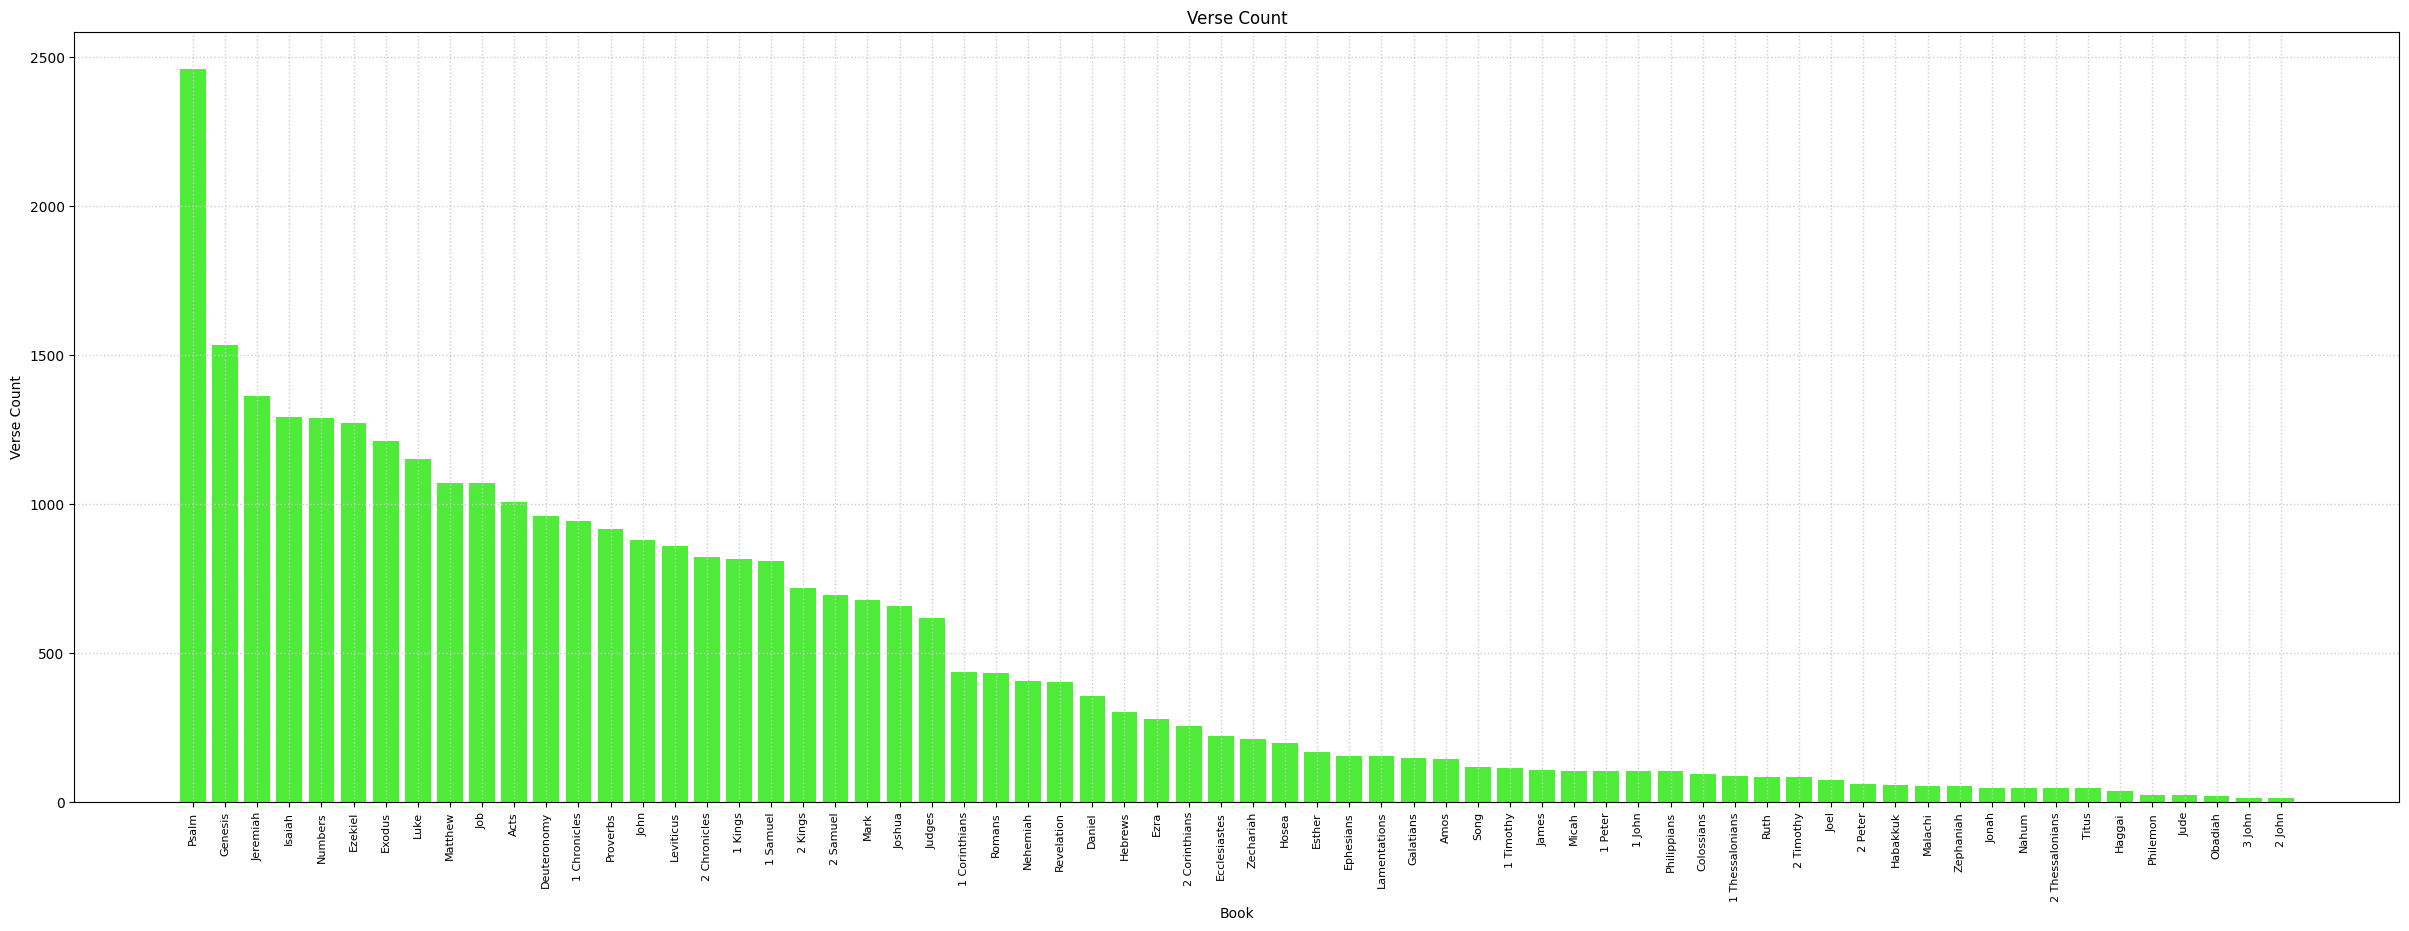

In [62]:

verses = {}
for book in bible:
    for chapter in bible[book]:
        for verse in bible[book][chapter]:
            if book not in verses:
                verses[book] = 1
            else:
                verses[book] = verses[book] + 1

# Sort the dictionary by value in descending order
verses = dict(sorted(verses.items(), key=lambda item: item[1], reverse=True))

# creating our data values
y = np.array([verses[x] for x in verses])
# show bars displaced to the right + 5
x = [i + 0.5 for i,_ in enumerate(verses)]
# add abackground grid
plt.grid(True, color = "#CCC", linewidth = "1", linestyle = "dotted", zorder=0)
# Bar
plt.bar(x,
        y,
        color=(random.random(), random.random(), random.random())
        )

    
#show ticks displaced to the right
plt.xticks([i + 0.5 for i,_ in enumerate(verses)], verses.keys(), rotation=90, fontsize=8)
# asking python to show us our plot
plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel('Book')
plt.ylabel('Verse Count')
plt.title('Verse Count')
plt.show()


In [63]:

# This could be avoided by working with dataframes directly, but this book is also a demo to show that this is possible
verses = pd.DataFrame(verses.items(), columns=['Book', 'Verses'])
display(HTML(verses.to_html()))


,Book,Verses
0,Psalm,2461
1,Genesis,1533
2,Jeremiah,1364
3,Isaiah,1292
4,Numbers,1288
5,Ezekiel,1273
6,Exodus,1213
7,Luke,1151
8,Matthew,1071
9,Job,1070


### Words Per Book

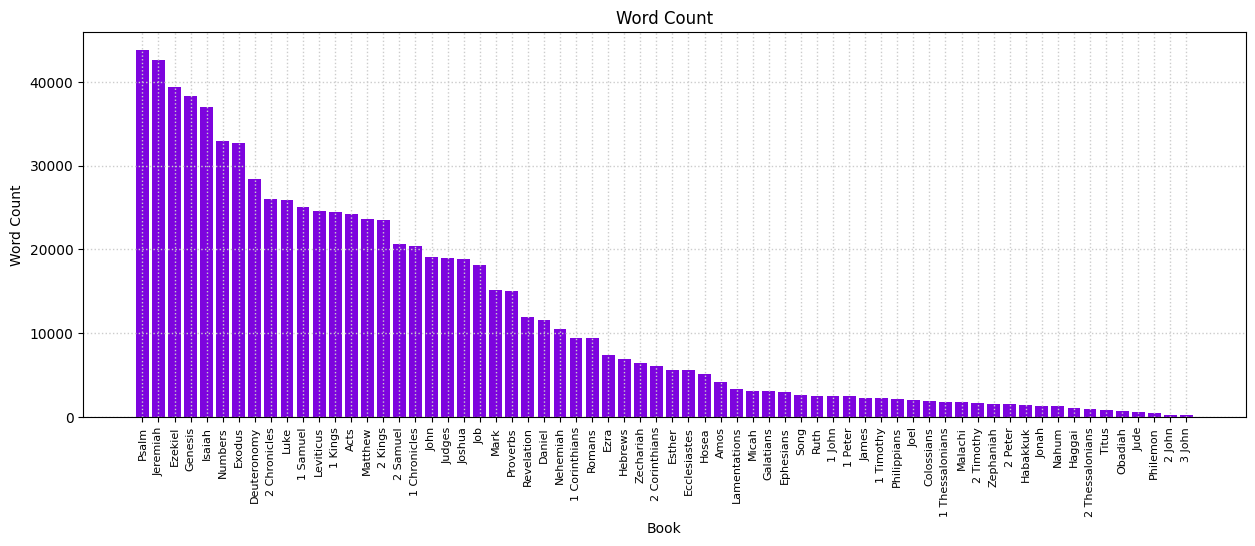

In [64]:

word_count = {}

for book in bible:
    for chapter in bible[book]:
        for verse in bible[book][chapter]:
            verse_words = clean_up_verse(bible[book][chapter][verse]).split(' ')
            if book not in word_count:
                word_count[book] = len(verse_words)
            else:
                word_count[book] = word_count[book] + len(verse_words)

# Sort the dictionary by value in descending order
word_count = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))


# creating our data values
y = np.array([word_count[x] for x in word_count])
# show bars displaced to the right + 5
x = [i + 0.5 for i,_ in enumerate(word_count)]
# add abackground grid
plt.grid(True, color = "#CCC", linewidth = "1", linestyle = "dotted", zorder=0)
# Bar
plt.bar(x,
        y,
        color=(random.random(), random.random(), random.random())
        )

    
#show ticks displaced to the right
plt.xticks([i + 0.5 for i,_ in enumerate(word_count)], word_count.keys(), rotation=90, fontsize=8)
# asking python to show us our plot
plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel('Book')
plt.ylabel('Word Count')
plt.title('Word Count')
plt.show()


In [65]:

word_count = pd.DataFrame(word_count.items(), columns=['Book', 'Words'])
display(HTML(word_count.to_html()))


,Book,Words
0,Psalm,43738
1,Jeremiah,42654
2,Ezekiel,39401
3,Genesis,38262
4,Isaiah,37036
5,Numbers,32896
6,Exodus,32686
7,Deuteronomy,28352
8,2 Chronicles,26069
9,Luke,25939


### Overall Word Distribution: Top 50 Most Recurrent Words

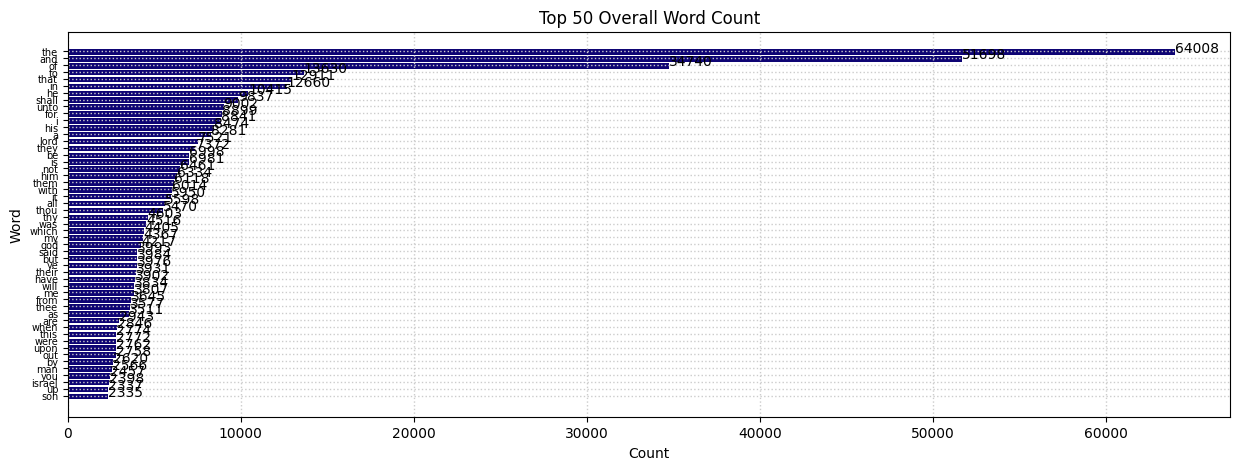

In [66]:
words = {}

for book in bible:
    for chapter in bible[book]:
        for verse in bible[book][chapter]:
            for word in clean_up_verse(bible[book][chapter][verse]).split(' '):
                if word not in words:
                    words[word] = 1
                else:
                    words[word] = words[word] + 1

# Sort alphabetically
words = {key: value for key, value in sorted(words.items())}
# Sort the dictionary by value in descending order
words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))
# This could be avoided by working with dataframes directly

df = pd.DataFrame({
    'Word': [word for word in list(words)[:51]],
    'Count': [words[word] for word in list(words)[:51]]
})
df = df.sort_values(by=['Count'])
plt.grid(True, color="#CCC", linewidth="1", linestyle="dotted", zorder=0)
plt.barh(y=df.Word,
         width=df.Count,
         color=(random.random(), random.random(), random.random())
         )
# show ticks displaced to the right
plt.yticks([i + 0.1 for i, _ in enumerate(df.Word)], df.Word, rotation=0, fontsize=7)

# asking python to show us our plot
plt.rcParams["figure.figsize"] = (30, 10)
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 50 Overall Word Count')

# Show values in the bars
for index, value in enumerate(df.Count):
    plt.text(value, index,
             str(value))

plt.show()


In [67]:
df = df.sort_values(by=['Count'], ascending=False)
display(HTML(df.to_html()))

,Word,Count
0,the,64008
1,and,51698
2,of,34740
3,to,13630
4,that,12911
5,in,12660
6,he,10415
7,shall,9837
8,unto,9002
9,for,8899


### Word Distribution Per Book

In [68]:

words = {}

for book in bible:
    for chapter in bible[book]:
        if chapter not in words:
            words[book] = {}

        for verse in bible[book][chapter]:
            for word in clean_up_verse(bible[book][chapter][verse]).split(' '):
                if word not in words[book]:
                    words[book][word] = 1
                else:
                    words[book][word] = words[book][word] + 1

words = pd.DataFrame(words.items(), columns=['Word', 'Count'])
display(HTML(words.to_html()))

,Word,Count
0,Genesis,"{'and': 61, 'joseph': 17, 'fell': 2, 'upon': 3, 'his': 18, 'father’s': 3, 'face': 2, 'wept': 2, 'him': 13, 'kissed': 1, 'commanded': 2, 'servants': 4, 'the': 38, 'physicians': 2, 'to': 11, 'embalm': 1, 'father:': 2, 'embalmed': 2, 'israel': 2, 'forty': 1, 'days': 5, 'were': 3, 'fulfilled': 2, 'for': 10, 'so': 3, 'are': 2, 'of': 31, 'those': 1, 'which': 7, 'embalmed:': 1, 'egyptians': 1, 'mourned': 2, 'threescore': 1, 'ten': 3, 'when': 4, 'mourning': 4, 'past': 1, 'spake': 3, 'unto': 12, 'house': 3, 'pharaoh': 4, 'saying': 6, 'if': 1, 'now': 5, 'i': 10, 'have': 2, 'found': 1, 'grace': 1, 'in': 11, 'your': 2, 'eyes': 1, 'speak': 1, 'pray': 4, 'you': 6, 'ears': 1, 'my': 4, 'father': 9, 'made': 3, 'me': 5, 'swear': 2, 'lo': 1, 'die:': 2, 'grave': 1, 'digged': 1, 'land': 7, 'canaan': 2, 'there': 3, 'shalt': 1, 'thou': 1, 'bury': 5, 'therefore': 2, 'let': 1, 'go': 2, 'up': 8, 'thee': 5, 'will': 6, 'come': 1, 'again': 1, 'said': 6, 'thy': 5, 'according': 2, 'as': 4, 'he': 10, 'went': 5, 'with': 5, 'all': 5, 'elders': 2, 'egypt': 4, 'brethren': 6, 'house:': 2, 'only': 1, 'their': 5, 'little': 2, 'ones': 2, 'flocks': 1, 'herds': 1, 'they': 10, 'left': 1, 'goshen': 1, 'both': 1, ...}"
1,Exodus,"{'and': 78, 'the': 143, 'lord': 14, 'spake': 1, 'unto': 5, 'moses': 12, 'saying': 1, 'on': 5, 'first': 4, 'day': 4, 'of': 40, 'month': 3, 'shalt': 17, 'thou': 16, 'set': 14, 'up': 14, 'tabernacle': 18, 'tent': 13, 'congregation': 12, 'put': 13, 'therein': 3, 'ark': 7, 'testimony': 4, 'cover': 1, 'with': 3, 'vail': 3, 'bring': 4, 'in': 15, 'table': 3, 'order': 3, 'things': 1, 'that': 7, 'are': 1, 'to': 6, 'be': 4, 'upon': 8, 'it': 11, 'candlestick': 2, 'light': 1, 'lamps': 2, 'thereof': 3, 'altar': 10, 'gold': 1, 'for': 3, 'incense': 2, 'before': 5, 'hanging': 4, 'door': 5, 'burnt': 5, 'offering': 5, 'laver': 3, 'between': 2, 'water': 3, 'court': 4, 'round': 2, 'about': 2, 'hang': 1, 'at': 2, 'gate': 2, 'take': 1, 'anointing': 2, 'oil': 1, 'anoint': 6, 'all': 7, 'is': 1, 'hallow': 1, 'vessels': 2, 'thereof:': 1, 'shall': 3, 'holy': 3, 'his': 7, 'sanctify': 3, 'altar:': 1, 'an': 2, 'most': 1, 'foot': 1, 'aaron': 3, 'sons': 3, 'wash': 2, 'them': 3, 'garments': 1, 'him': 3, 'he': 15, 'may': 2, 'minister': 2, 'me': 2, 'priest’s': 2, 'office': 1, 'clothe': 1, 'coats:': 1, 'as': 8, 'didst': 1, 'their': 7, 'father': 1, 'they': 5, 'office:': 1, 'surely': 1, 'everlasting': 1, 'priesthood': 1, 'throughout': 2, ...}"
2,Leviticus,"{'and': 37, 'the': 88, 'lord': 15, 'spake': 1, 'unto': 26, 'moses': 2, 'saying': 1, 'speak': 1, 'children': 2, 'of': 46, 'israel': 2, 'say': 1, 'them': 1, 'when': 3, 'a': 22, 'man': 10, 'shall': 57, 'make': 1, 'singular': 1, 'vow': 1, 'persons': 1, 'be': 45, 'for': 8, 'by': 1, 'thy': 18, 'estimation': 19, 'male': 4, 'from': 6, 'twenty': 4, 'years': 7, 'old': 7, 'even': 8, 'sixty': 2, 'fifty': 2, 'shekels': 9, 'silver': 4, 'after': 2, 'shekel': 3, 'sanctuary': 1, 'if': 22, 'it': 43, 'female': 4, 'then': 17, 'thirty': 1, 'five': 3, 'ten': 2, 'month': 1, 'three': 1, 'above': 1, 'fifteen': 1, 'but': 5, 'he': 23, 'poorer': 1, 'than': 1, 'present': 2, 'himself': 1, 'before': 2, 'priest': 9, 'value': 3, 'him': 7, 'according': 7, 'to': 13, 'his': 10, 'ability': 1, 'that': 8, 'vowed': 1, 'beast': 7, 'whereof': 1, 'men': 2, 'bring': 1, 'an': 3, 'offering': 1, 'all': 8, 'any': 4, 'giveth': 1, 'such': 1, 'holy': 9, 'not': 8, 'alter': 1, 'nor': 1, 'change': 5, 'good': 4, 'bad': 3, 'or': 10, 'good:': 1, 'at': 5, 'exchange': 1, 'thereof': 5, 'unclean': 2, 'which': 6, 'they': 1, 'do': 1, 'offer': 1, 'sacrifice': 1, 'priest:': 1, 'whether': 5, 'bad:': 2, 'as': 4, 'thou': 1, 'valuest': 1, ...}"
3,Numbers,"{'and': 16, 'the': 65, 'chief': 2, 'fathers': 6, 'of': 57, 'families': 3, 'children': 12, 'gilead': 1, 'son': 3, 'machir': 1, 'manasseh': 2, 'sons': 4, 'joseph': 3, 'came': 1, 'near': 2, 'spake': 1, 'before': 2, 'moses': 4, 'princes': 1, 'israel:': 2, 'they': 7, 'said': 2, 'lord': 8, 'commanded': 5, 'my': 2, 'to': 12, 'give': 